# Investigate topology of a network

In [1]:
import os
import pypsa
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import cm
from numpy import linspace

warnings.filterwarnings(action="ignore")

In [2]:
if not os.path.isdir("pypsa-earth"):
    os.chdir("../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")

In [3]:
scenario_name = ""  # scenario name, default value is "" for tutorial or default configuration
                    # value shall be non null if a scenario name is specified under the "run" tag in the config file
fl_name = "elec.nc"

scenario_subpath = scenario_name + "/" if scenario_name else ""
#fl_path = os.path.join("pypsa-earth/networks/", scenario_subpath, fl_name)

In [4]:
#n = pypsa.Network("C:/Users/hie/pe_tan/pypsa-earth/results/2040_base/networks/elec_s_all_ec_lcopt_1h.nc")
n = pypsa.Network("C:/Users/hie/pe_tan/pypsa-earth/results/2040_base/networks/elec_s_all_ec_lcopt_1h.nc")

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


## Extract topology parameters

In [5]:
# needed to evaluate partition by networks
n.determine_network_topology()

bus_subnw = n.buses.sub_network
lines_subnw = n.lines.sub_network

## Base plot

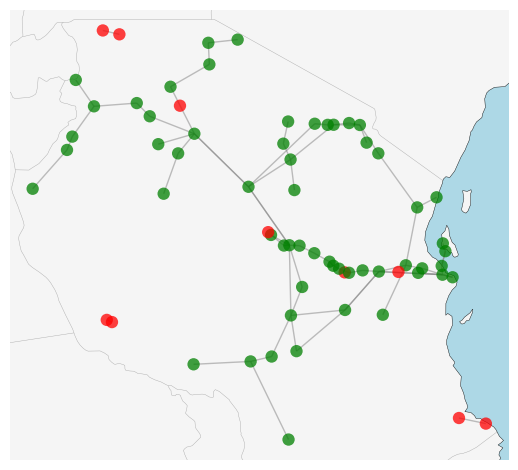

In [6]:
n.plot(
    bus_colors=bus_subnw.map(lambda ct: "green" if ct == "0" else "red"),
	bus_alpha=0.75,
    line_colors="grey",
    line_widths=1,
    line_alpha=0.5,
    link_colors="red",
    link_alpha=0.1,
    color_geomap=True,
)
plt.tight_layout()
# saves the plot in a folder alongsige with the network file
# plt.savefig(fl_path + "_buses_by_subnw.pdf")

## Colorful plot

In [7]:
subnetworks = bus_subnw.unique()

cm_subsection = linspace(0.25, 0.9, len(subnetworks)) 
colors = [ cm.gnuplot2(x) for x in cm_subsection ]


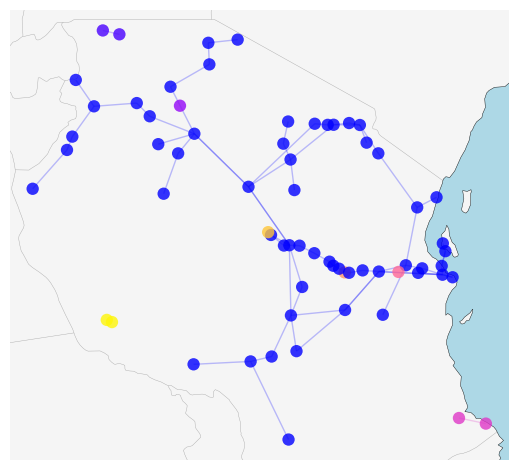

In [8]:
n.plot(
    bus_colors=bus_subnw.map(lambda ct: colors[subnetworks.tolist().index(ct)]),
	bus_alpha=0.8,
    line_colors=lines_subnw.map(lambda ct: colors[subnetworks.tolist().index(ct)]),
    line_widths=1,
    line_alpha=0.25,
    link_colors="red",
    link_alpha=0.1,
    color_geomap=True,
)
plt.tight_layout()
# saves the plot in a folder alongsige with the network file
# plt.savefig(fl_path + "_buses_by_subnw2.pdf")